In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

#plt.style.use('fivethirtyeight')

#%run ./two-histograms.ipynb

In [2]:
### Create column list for different categories

In [3]:
demographic = ['hospital_death','age','bmi','weight','height','elective_surgery','ethnicity','gender','hospital_id','hospital_admit_source',
'icu_admit_source','icu_id','icu_stay_type','icu_type','pre_icu_los_days']

# APACHE related measurements
# ---
# 18 measurements
apache_cov = ['albumin_apache','bilirubin_apache','bun_apache','creatinine_apache','glucose_apache','heart_rate_apache',
          'hematocrit_apache','resprate_apache','sodium_apache','temp_apache','urineoutput_apache','wbc_apache',
          'fio2_apache','map_apache','paco2_apache','paco2_for_ph_apache','pao2_apache','ph_apache']
# 4 indicators
apache_indicators = ['apache_post_operative','arf_apache','intubated_apache','ventilated_apache']

# 8 Chronic health status
apache_chronic = ['aids','cirrhosis','diabetes_mellitus','hepatic_failure',
                  'immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis']
# 6 others
apache_others =['apache_2_diagnosis','apache_3j_diagnosis', 'apache_3j_bodysystem','apache_2_bodysystem',
                'apache_4a_hospital_death_prob','apache_4a_icu_death_prob']

gcs = ['gcs_eyes_apache','gcs_motor_apache','gcs_unable_apache','gcs_verbal_apache']

apache = apache_cov + apache_indicators + apache_chronic + apache_others + gcs
# ---

vitals_names = ['diasbp_invasive','diasbp','diasbp_noninvasive','sysbp_invasive', 'sysbp', 'sysbp_noninvasive', 
                'mbp_invasive', 'mbp', 'mbp_noninvasive','heartrate','resprate' ,'spo2', 'temp']
labs_names = ['albumin','bilirubin', 'bun','calcium', 'creatinine', 'glucose', 'hco3', 'hemaglobin','hematocrit','inr',
        'lactate',  'platelets','potassium', 'sodium', 'wbc']

vitals = ['diasbp_invasive_max','diasbp_invasive_min','diasbp_max','diasbp_min','diasbp_noninvasive_max', 'diasbp_noninvasive_min', 
          'sysbp_invasive_max','sysbp_invasive_min','sysbp_max','sysbp_min', 'sysbp_noninvasive_max','sysbp_noninvasive_min',
          'mbp_invasive_max', 'mbp_invasive_min', 'mbp_max', 'mbp_min','mbp_noninvasive_max', 'mbp_noninvasive_min', 
          'heartrate_max','heartrate_min','resprate_max','resprate_min','spo2_max','spo2_min','temp_max','temp_min']

labs = ['albumin_max', 'albumin_min', 'bilirubin_max' ,'bilirubin_min', 'bun_max',
 'bun_min', 'calcium_max', 'calcium_min', 'creatinine_max', 'creatinine_min',
 'glucose_max', 'glucose_min', 'hco3_max' ,'hco3_min', 'hemaglobin_max',
 'hemaglobin_min' ,'hematocrit_max', 'hematocrit_min' ,'inr_max' ,'inr_min',
 'lactate_max', 'lactate_min', 'platelets_max', 'platelets_min',
 'potassium_max' ,'potassium_min', 'sodium_max', 'sodium_min', 'wbc_max',
 'wbc_min']

# Arterial blood gas test
lab_blood_gas = ['arterial_pco2_max', 'arterial_pco2_min', 'arterial_ph_max', 'arterial_ph_min', 
                 'arterial_po2_max', 'arterial_po2_min', 'pao2fio2ratio_max', 'pao2fio2ratio_min']

print("The number of columns for demographic: ",len(demographic))
print("The number of columns for vitals: ",len(vitals))
print("The number of columns for lab tests: ",len(labs))
print("The number of columns for vitals_names: ",len(vitals_names)) 
print("The number of columns for labsnames: ",len(labs_names))
print("The number of columns for arterial blood gas test: ",len(lab_blood_gas))
print("The number of columns for Glasgow Coma Score: ",len(gcs))
print("The number of columns for APACHE 3 measurements: ",len(apache_cov))
print("The number of columns for APACHE Chronic Health Status: ",len(apache_chronic))
print("The number of columns for other APACHE measurements: ",len(apache_others))
print("Total number of columns for APACHE: ",len(apache))

h1_vitals = ['h1_'+name for name in vitals]
d1_vitals = ['d1_'+name for name in vitals]
h1_labs = ['h1_'+name for name in labs]
d1_labs = ['d1_'+name for name in labs]
h1_lbg = ['h1_'+name for name in lab_blood_gas]
d1_lbg = ['d1_'+name for name in lab_blood_gas]

The number of columns for demographic:  15
The number of columns for vitals:  26
The number of columns for lab tests:  30
The number of columns for vitals_names:  13
The number of columns for labsnames:  15
The number of columns for arterial blood gas test:  8
The number of columns for Glasgow Coma Score:  4
The number of columns for APACHE 3 measurements:  18
The number of columns for APACHE Chronic Health Status:  8
The number of columns for other APACHE measurements:  6
Total number of columns for APACHE:  40


## 1. Load the dataset

In [4]:
train = pd.read_csv('../data/training_v2.csv')
df = pd.read_csv('../data/train_clean_ph2.csv')
df2 = pd.read_csv('../data/train_clean_ph3.csv')
print(train.shape, df.shape)

(91713, 186) (91713, 183)


In [5]:
df.head()

,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,118,0,25.0,31.95,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,118,0,81.0,22.64,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,33,0,19.0,NaN,0,Caucasian,M,188.0,Emergency Department,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


## 2. Feature Engineering

### 1) New Variable to Classify patient's Diagnosis
* Create new varible to group patients by 3j diagnosis' main diagnosis (ignore the sub-diagnosis(the decimals) For example:

|Illness|Non-Operative|Post-operative|
|-----|-----|-----|
|Cardiovascular|1xx|12xx|
|Respiratory|2xx, 3xx|13xx|
|Neurological|4xx|15xx| 

In [6]:
# Create new varible to group patients by 3j diagnosis' main diagnosis (ignore the sub-diagnosis - decimals)
df['apache_3j_diag_int'] = df['apache_3j_diagnosis'].fillna(0).astype(str).map(lambda i: i.split('.')[0])

### 2) Tag Critically ill Patients at ICU admission
For critically ill patients in the ICU, monitoring of arterial blood pressure (BP) is a mainstay of hemodynamic monitoring - hypotension and hypertension. [literature](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5766655/).  I'll use the h1 invasive BP data to tag patients as "critically_ill' at ICU admission

In [7]:
# Extract invasive BP variables in the first hour
invasive_h1 = [col for col in df.columns if ("_invasive_" in col) & ("h1_" in col)]
invasive_h1

['h1_diasbp_invasive_max',
 'h1_diasbp_invasive_min',
 'h1_mbp_invasive_max',
 'h1_mbp_invasive_min',
 'h1_sysbp_invasive_max',
 'h1_sysbp_invasive_min']

In [8]:
# If any of these "_invasive_" columns is not null, the patient has invasive arterial BP measurement
df["critically_ill"] = df[invasive_h1].any(axis='columns').astype(int)

In [9]:
# Verify the variable is created corrected
print(df[df[invasive_h1].isnull().sum(axis=1)<6].shape)    # patients with invasive BP measurements
print(df[(df[invasive_h1].isnull().sum(axis=1)<6) & (df["critically_ill"]==1)].shape)  # patients with invasive BP and tagged

(17077, 185)
(17077, 185)


### 3) Bun to creatinine Ratio - using d1 data
The ratio of BUN to creatinine is usually between 10:1 and 20:1. An increased ratio may be due to a condition that causes a decrease in the flow of blood to the kidneys, such as congestive heart failure or dehydration. It may also be seen with increased protein, from gastrointestinal bleeding, or increased protein in the diet. The ratio may be decreased with liver disease (due to decrease in the formation of urea) and malnutrition. [source](https://labtestsonline.org/tests/blood-urea-nitrogen-bun)

In [10]:
# df['bun_to_creatinine'] = round(df.bun_apache/df.creatinine_apache,2) 
df['bun_to_creatinine'] = round(df.d1_bun_max/df.d1_creatinine_max,2)

In [11]:
bun_col = [i for i in df.columns if 'bun' in i]
df[bun_col].isnull().sum()

bun_apache            9762
d1_bun_max           10514
d1_bun_min           10514
h1_bun_max           75091
h1_bun_min           75091
bun_to_creatinine    10736
dtype: int64

In [12]:
creatinine_col = [i for i in df.columns if "creatinine" in i]
df[creatinine_col].isnull().sum()

creatinine_apache    18853
d1_creatinine_max    10169
d1_creatinine_min    10169
h1_creatinine_max    74957
h1_creatinine_min    74957
bun_to_creatinine    10736
dtype: int64

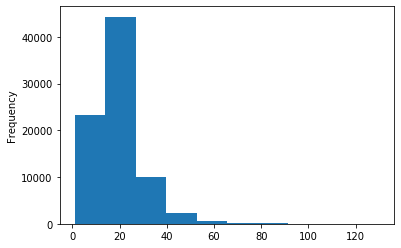

In [13]:
df['bun_to_creatinine'].plot.hist()

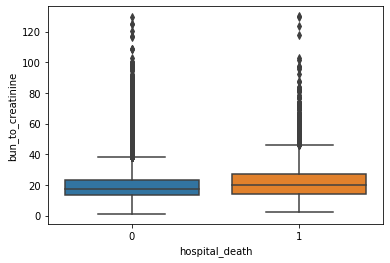

In [14]:
sns.boxplot(df.hospital_death, df.bun_to_creatinine)

### 4) Columns to show the number of test a patients received at First Hour and First Day

In [15]:
h1_cols = [col for col in df.columns if col.startswith("h1_")]
print(len(h1_cols))
print(len(h1_labs))
print(h1_labs)
print(h1_lbg)

d1_cols = [col for col in df.columns if col.startswith("d1_")]
print(len(d1_cols))
print(len(d1_labs))
print(d1_labs)

64
30
['h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min', 'h1_sodium_max', 'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min']
['h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min', 'h1_arterial_po2_max', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min']
64
30
['d1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_hemaglobi

In [16]:
print("Data Dimention: ",df.shape)

df["h1_ttl_tests"] = df[h1_cols].notnull().sum(axis=1)    # total number of tests in the 1st hour
df["d1_ttl_tests"] = df[d1_cols].notnull().sum(axis=1)    # total number of tests in the 1st day

df['h1_num_labs'] = df[h1_labs].notnull().sum(axis=1)     # total number of lab tests in the 1st hour
df['d1_num_labs'] = df[d1_labs].notnull().sum(axis=1)     # total number of lab tests in the 1st day

df['h1_lbg'] = df[h1_lbg].notnull().any(axis=1).astype(int) # Did patient receive lab blood gas test in the 1st hour?
df['d1_lbg'] = df[d1_lbg].notnull().any(axis=1).astype(int) # Did patient receive lab blood gas test in the 1st day?

# Patient's condition change by looking at the change of num of tests
# for variables that look at percentage change, denominator+1 to  prevend division by 0
#df['total_tests_increase'] = round((df["d1_ttl_tests"] - df["h1_ttl_tests"])/(df["h1_ttl_tests"]+0.1),2)
#df['total_tests_increase'] = np.clip(df['total_tests_increase'],0,700)
#df['total_labs_increase'] = round((df['d1_num_labs'] - df['h1_num_labs'])/(df['h1_num_labs']+0.1),2)
#df['total_labs_increase'] = np.clip(df['total_labs_increase'],0,300)

# Patient's condition change by looking at the change of num of tests
df['total_tests_increase'] = df["d1_ttl_tests"] - df["h1_ttl_tests"]
df['total_labs_increase'] = df['d1_num_labs'] - df['h1_num_labs']
df['added_lbg'] = df['d1_lbg'] - df['h1_lbg']

print("Data Dimention: ",df.shape)
#df

Data Dimention:  (91713, 186)
Data Dimention:  (91713, 195)


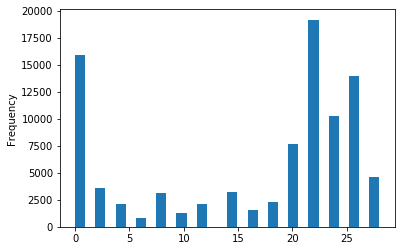

In [17]:
df['total_labs_increase'].plot.hist(bins=30)

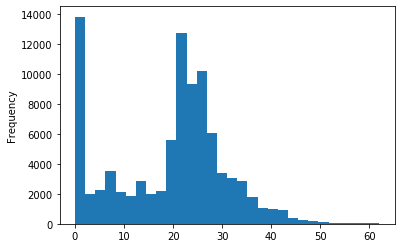

In [18]:
df['total_tests_increase'].plot.hist(bins=30)

### 5) Variable to count the Number of Chronic illness that a patient has

['aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']


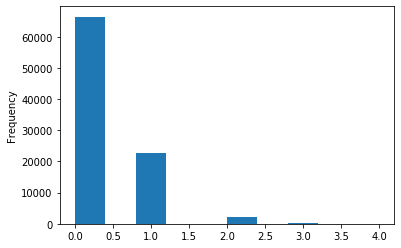

In [19]:
print(apache_chronic)
df['chronic_diagnosis'] = df[apache_chronic].sum(axis=1)
df['chronic_diagnosis'].plot.hist()

### Checkpoint

In [20]:
# New variables are:
new_cols = set(df.columns).difference(set(train.columns))
new_cols

{'added_lbg',
 'apache_3j_diag_int',
 'bun_to_creatinine',
 'chronic_diagnosis',
 'critically_ill',
 'd1_lbg',
 'd1_num_labs',
 'd1_ttl_tests',
 'h1_lbg',
 'h1_num_labs',
 'h1_ttl_tests',
 'total_labs_increase',
 'total_tests_increase'}

### Add these New Columns to `train_clean_ph3.csv` data

In [21]:
print(df2.shape)
new_df2 = pd.concat((df2,df[new_cols]), axis=1)
print(new_df2.shape)

(91713, 138)
(91713, 151)


### Save the dataframe

In [22]:
df.shape

(91713, 196)

In [23]:
df.to_csv('../data/train_ph2_newfeatures.csv', index=False)

In [24]:
new_df2.to_csv('../data/train_ph3_newfeatures.csv', index=False)